In [1]:
from nbloader import Notebook

notebook = Notebook('test.ipynb')
# tag __init__ is executed
assert notebook.ns['a'] == 5

notebook.run_all()
assert notebook.ns['a'] == 6
assert notebook.ns['b'] == 10

notebook = Notebook('test.ipynb')
try:
    notebook.ns['b']
except KeyError:
    assert True
else:
    assert False

assert notebook.run_tag('create_b').ns['b'] == 10

after compile before __init__
I am inside loaded_notebook!
in __init__
I should still be in __init__
I am inside loaded_notebook!
in __init__
I should still be in __init__
Ran Data (heading 1)
Ran Data 1 (heading 2)
Ran Data 2 (heading 2)
Ran Plot 1 (heading 2)
Ran Plot 2 (heading 2)
after compile before __init__
I am inside loaded_notebook!
in __init__
I should still be in __init__


In [2]:
try:
    a
except NameError:
    assert True
else:
    assert False
notebook = Notebook('test.ipynb', ns=globals())
assert a == 5
del a

after compile before __init__
I am inside loaded_notebook!
in __init__
I should still be in __init__


In [3]:
notebook = Notebook('test.ipynb')
notebook.run_tag('add_one')
print(notebook.ns['a']) # 6
assert notebook.ns['a'] == 6

notebook.run_tag('add_one')
print(notebook.ns['a']) # 7
assert notebook.ns['a'] == 7

notebook.ns['a'] = 0
notebook.run_tag('add_one')
print(notebook.ns['a']) # 1
assert notebook.ns['a'] == 1

after compile before __init__
I am inside loaded_notebook!
in __init__
I should still be in __init__
6
7
1


In [4]:
for c in notebook.cells:
    print(c['tags'])

['This is a test notebook', '# This is a test notebook', '__init__']
['This is a test notebook', '# This is a test notebook', 'create_b']
['This is a test notebook', '# This is a test notebook', 'add_one']
['This is a test notebook', '# This is a test notebook', '__init__']
['This is a test notebook', '# This is a test notebook', '__init__']
['This is a test notebook', '# This is a test notebook', '__init__']
['This is a test notebook', '# This is a test notebook']
['Data', '# Data']
['Data', '# Data', 'Data 1', '## Data 1']
['Data', '# Data', 'Data 1', '## Data 1']
['Data', '# Data', 'Data 2', '## Data 2']
['Data', '# Data', 'Data 2', '## Data 2']
['Plot', '# Plot', 'Plot 1', '## Plot 1']
['Plot', '# Plot', 'Plot 1', '## Plot 1']
['Plot', '# Plot', 'Plot 2', '## Plot 2']
['Plot', '# Plot', 'Plot 2', '## Plot 2']
['Plot', '# Plot', 'Plot 2', '## Plot 2']


Ran Data (heading 1)
Ran Data 1 (heading 2)
Ran Data 2 (heading 2)
Ran Data (heading 1)
Ran Data 1 (heading 2)
Ran Data 2 (heading 2)
-----data h1 done-----
Ran Data 1 (heading 2)
Ran Data 1 (heading 2)
-----data 1 h2 done-----
Ran Data 2 (heading 2)
Ran Data 2 (heading 2)
-----data 2 h2 done-----
Ran Plot 1 (heading 2)
Ran Plot 2 (heading 2)
Ran Plot 1 (heading 2)
Ran Plot 2 (heading 2)
-----plot h1 done-----
Ran Plot 1 (heading 2)
Ran Plot 1 (heading 2)
-----plot 1 h2 done-----
Ran Plot 2 (heading 2)
Ran Plot 2 (heading 2)
-----plot 2 h2 done-----


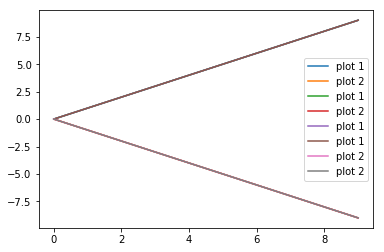

In [5]:
# we should see everything run twice
notebook.run_tag('Data')
notebook.run_tag('# Data')
print('-----data h1 done-----')
notebook.run_tag('Data 1')
notebook.run_tag('## Data 1')
print('-----data 1 h2 done-----')
notebook.run_tag('Data 2')
notebook.run_tag('## Data 2')
print('-----data 2 h2 done-----')

notebook.run_tag('Plot')
notebook.run_tag('# Plot')
print('-----plot h1 done-----')
notebook.run_tag('Plot 1')
notebook.run_tag('## Plot 1')
print('-----plot 1 h2 done-----')
notebook.run_tag('Plot 2')
notebook.run_tag('## Plot 2')
print('-----plot 2 h2 done-----')